In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
# points per attempt given share of total possesions in a game where a 3 pointer was attempted 
# and the probability of making a 3 or a 2 pointer
def made_basket(attempt_3, prob_3_make, prob_2_make):
    
    if random.random() <= attempt_3:
        
        return 3 if random.random() <= prob_3_make else 0
    
    else:
        
        return 2 if random.random() <= prob_2_make else 0


# returns a list containing points made in a game given number of attempts per game
def game(attempts, attempt_3, prob_3_make, prob_2_make):
    
    made_baskets = [made_basket(attempt_3, prob_3_make, prob_2_make) for a in xrange(attempts)]
    
    return made_baskets


# calculate total points per game and create list of total points for the season
def season(games, attempts, attempt_3, prob_3_make, prob_2_make):
    
    season_outcome = [sum(game(attempts, attempt_3, prob_3_make, prob_2_make)) for g in xrange(games)]
    
    return season_outcome


What happens to the distribution of total scores when only three-pointers or only two-pointers are attempted?

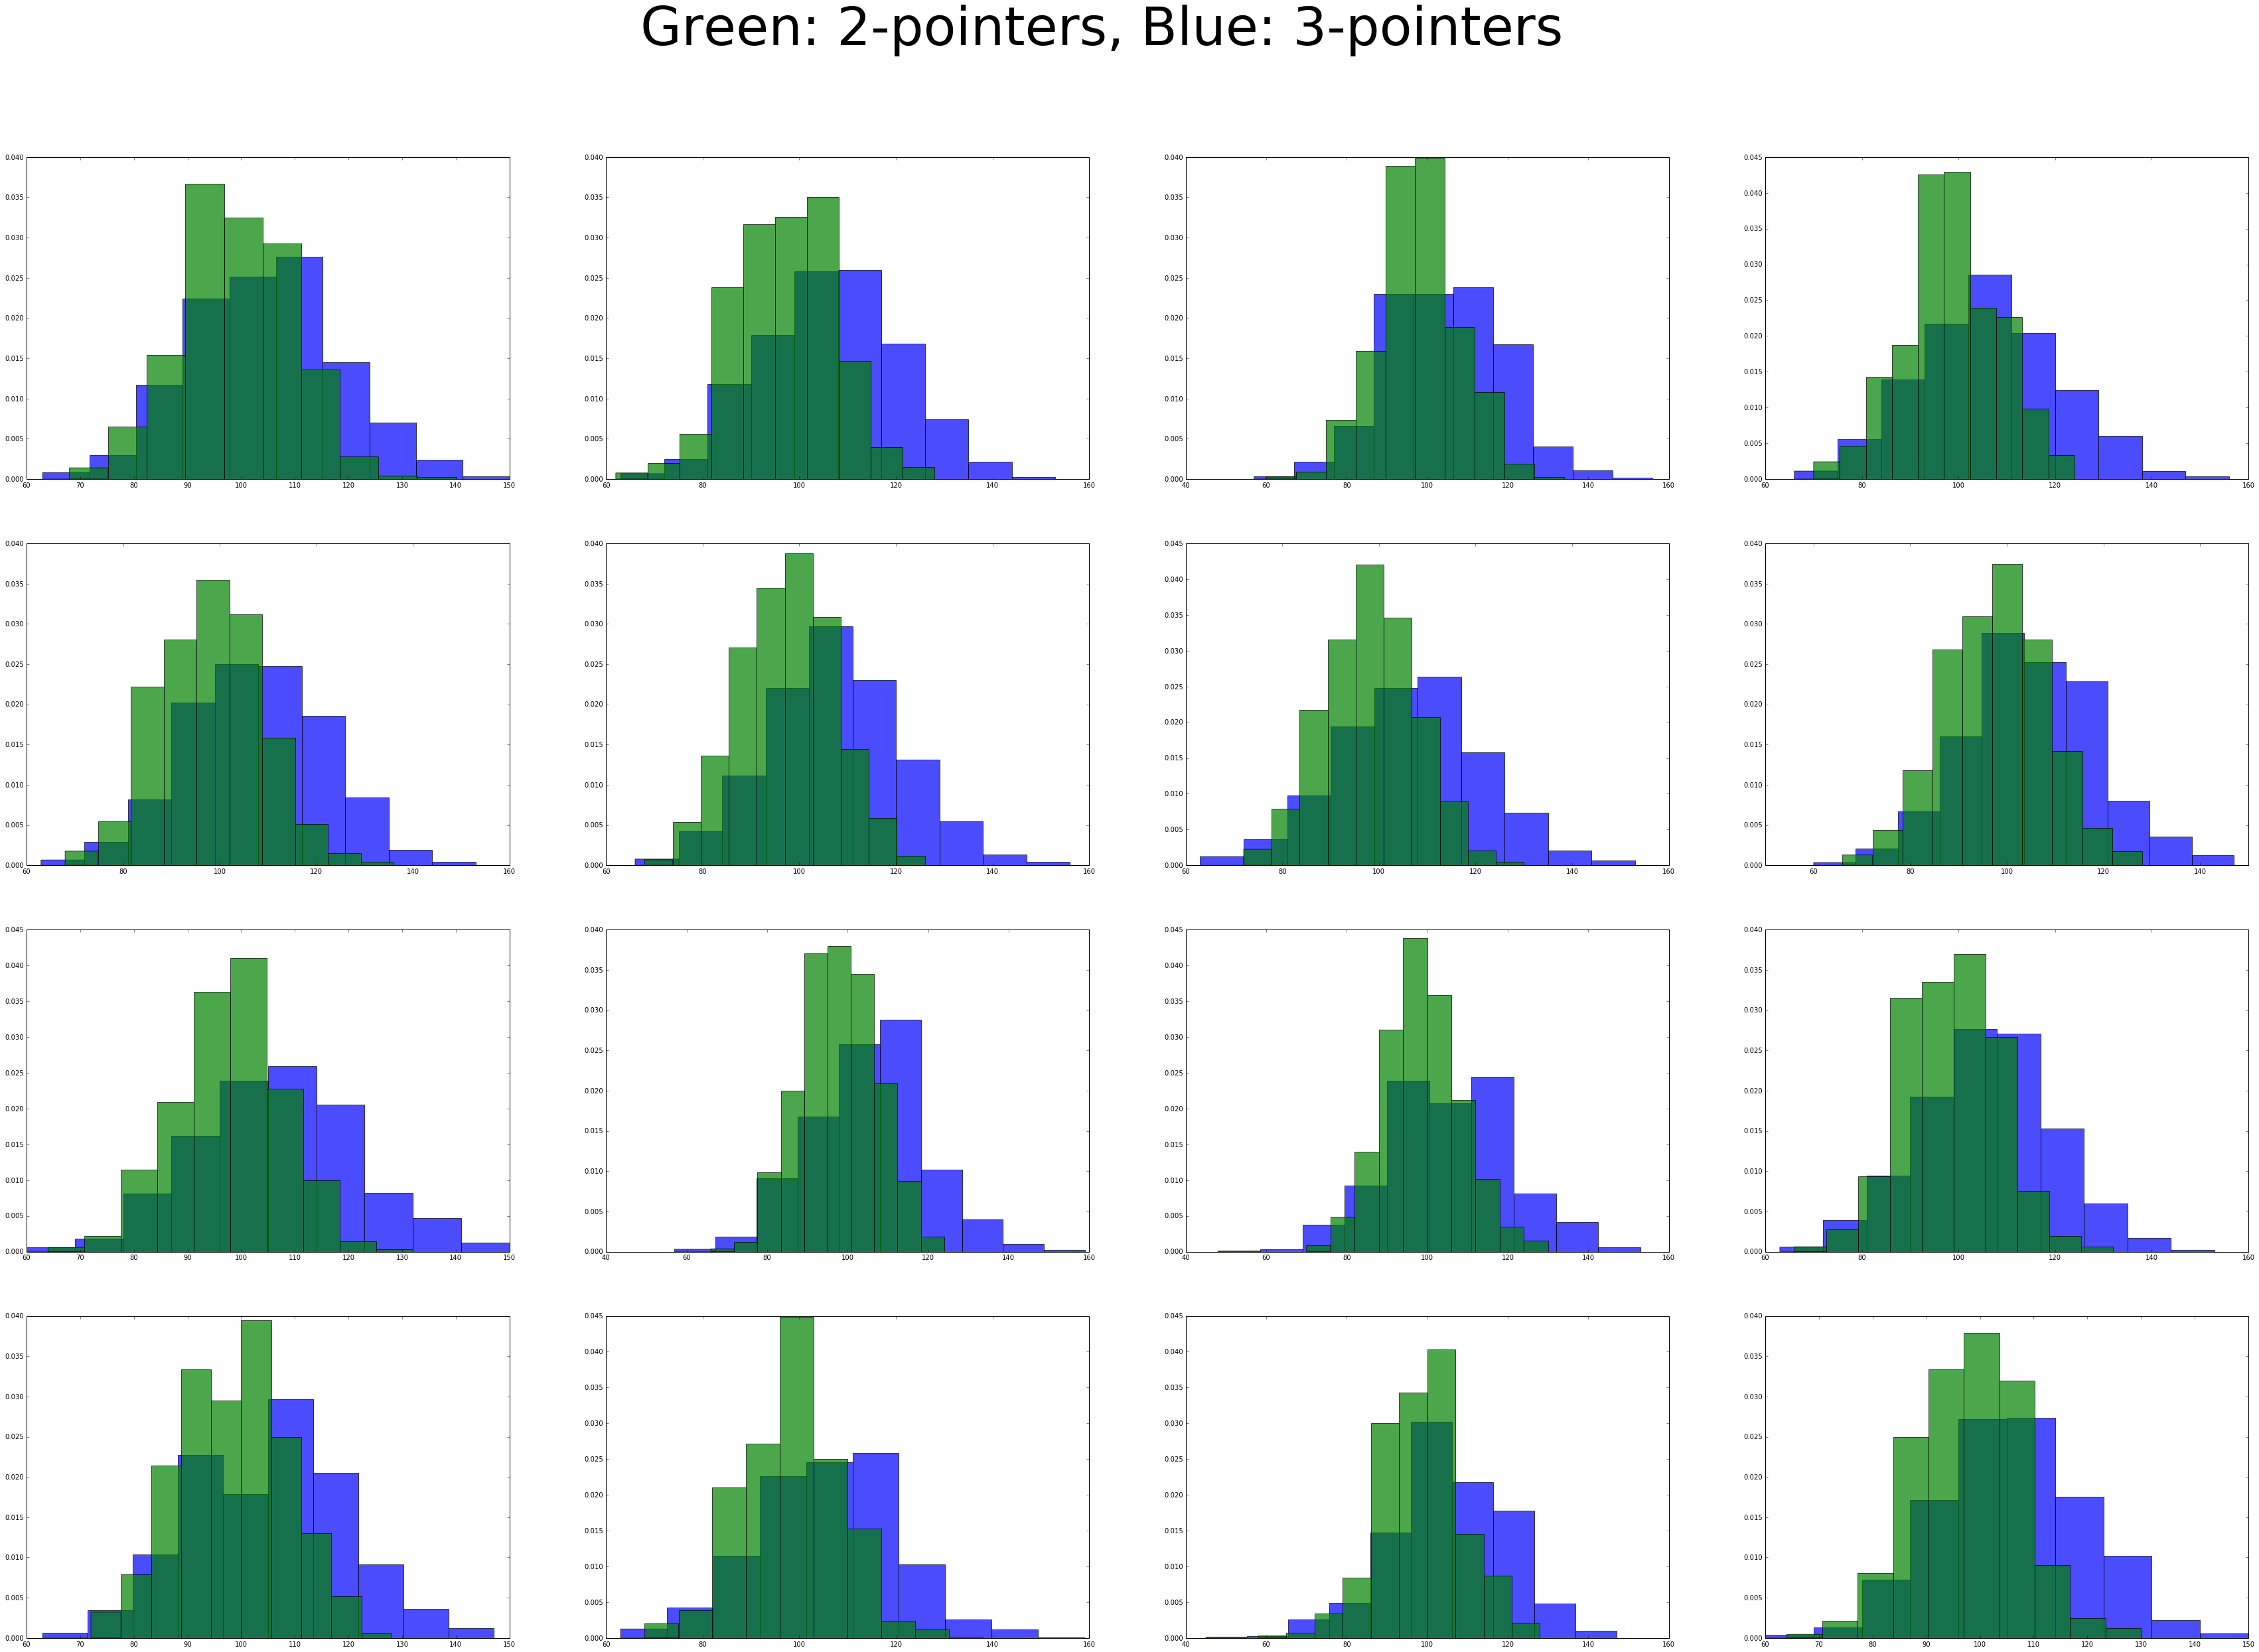

In [38]:
%matplotlib inline

plt.figure(figsize=(60,40))

for i in np.arange(16):

    # only three pointers are attempted
    season_3pt = season(games=1000, attempts=100, attempt_3=1, prob_3_make=.35, prob_2_make=.49)

    # only two pointers are attempted
    season_2pt = season(games=1000, attempts=100, attempt_3=0, prob_3_make=.35, prob_2_make=.49)

    plt.subplot(4,4,i+1)
    plt.hist(season_3pt, normed=True, bins=10, alpha=0.7)
    plt.hist(season_2pt, normed=True, bins=10, alpha=0.7)


plt.suptitle('Green: 2-pointers, Blue: 3-pointers', fontsize=80)
plt.show()


In [32]:
# season where only 3 pointers are attempted
s3pt = season(games=1000, attempts=100, attempt_3=1, prob_3_make=.35, prob_2_make=0.5)
print np.mean(s3pt), np.std(s3pt)

# season where only 2 pointers are attempted
s2pt = season(games=1000, attempts=100, attempt_3=0, prob_3_make=.35, prob_2_make=.5)
print np.mean(s2pt), np.std(s2pt)

105.039 14.8088311153
100.122 9.83855253582


**Conclusion:** games where more three-pointers are attempted have higher average scores and greater variance in total scores